# Mögliche Lösung für die male-daan-schnell-mal-klassifizieren Kaggle competition
https://www.kaggle.com/c/male-daan-schnell-mal-klassifizieren/data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
%matplotlib inline

In [19]:
kaggle_train = "https://raw.githubusercontent.com/sakuronohana/cas_datenanalyse/master/PVA1/FeatureTransform_train.csv"
dftrain = pd.read_csv(kaggle_train, index_col=0)
dftrain.head()

,X1,X2,y
0,7.09,8.15,1
1,-4.63,1.72,0
2,-3.20,2.37,0
3,-3.16,2.10,0
4,-0.30,2.86,1


In [0]:
kaggle_test = "https://raw.githubusercontent.com/sakuronohana/cas_datenanalyse/master/PVA1/FeatureTransform_test.csv"
Xtest=pd.read_csv(kaggle_test)

In [18]:
Xtrain = dftrain[['X1','X2']]
ytrain = dftrain[['y']]
dftest = pd.read_csv(kaggle_test,index_col=0)
dftest.head()

,X1,X2
0,4.65,0.66
1,-13.37,-3.63
2,-5.43,2.88
3,-2.33,6.55
4,-3.30,2.64


In [0]:
Xtest = dftest[['X1','X2']]

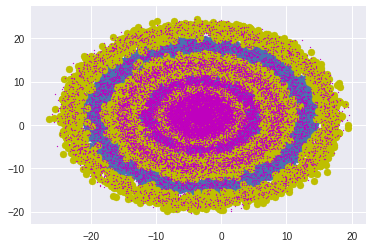

In [29]:
#Prüfe, das die Trainings- und Testdaten eine ähnliche Struktur haben
plt.scatter(Xtrain.values[ytrain.y==0,0],Xtrain.values[ytrain.y==0,1], label='y=0')
plt.scatter(Xtrain.values[ytrain.y==1,0],Xtrain.values[ytrain.y==1,1],c='y', label='y=1')
plt.scatter(Xtest.values[:,0],Xtest.values[:,1],c='m',s=1)

## Try a decision Tree

In [0]:
## Semi-Clever Test
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(Xtrain,ytrain)

yhat_test = clf.predict(Xtest)
yhat_train = clf.predict(Xtrain)

dfsol_semiclever = pd.Series(yhat_test,dtype='int',name='y')
dfsol_semiclever.index.name='Id'

dfsol_semiclever.to_csv('semi_clever_submission.csv',header=True)

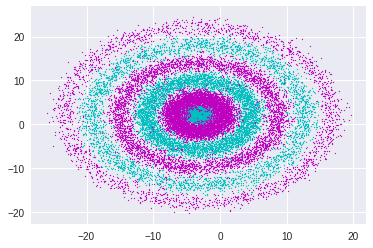

In [30]:
#plt.scatter(Xtrain.values[yhat_train==0,0],Xtrain.values[yhat_train==0,1],s=1)
#plt.scatter(Xtrain.values[yhat_train==1,0],Xtrain.values[yhat_train==1,1],c='y',s=1)
#plt.scatter(Xtest.values[y_test==0,0],Xtest.values[y_test==0,1],c='c',s=1)
#plt.scatter(Xtest.values[y_test==1,0],Xtest.values[y_test==1,1],c='m',s=1)
plt.scatter(Xtest.values[yhat_test==0,0],Xtest.values[yhat_test==0,1],c='c',s=1)
plt.scatter(Xtest.values[yhat_test==1,0],Xtest.values[yhat_test==1,1],c='m',s=1)

# New Section

In [0]:
## Try a KNN Classifier

In [0]:
validation_curve?

clf=KNeighborsClassifier(n_neighbors=5)
klist=[1,5,10,20,50,100,150,200,300,500]
train_scores1, test_scores1 = validation_curve(clf, Xtrain, ytrain.values.ravel(),'n_neighbors',klist,cv=10,n_jobs=4)

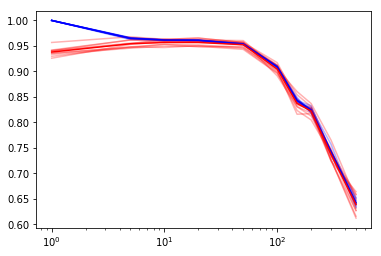

In [0]:
plt.semilogx(klist,train_scores1,c='b',alpha=0.3)
plt.semilogx(klist,test_scores1,c='r',alpha=0.3);

plt.semilogx(klist,np.mean(train_scores1,axis=1),c='b',alpha=1.0);
plt.semilogx(klist,np.mean(test_scores1,axis=1),c='r',alpha=1.0);

(0.9, 1.0)

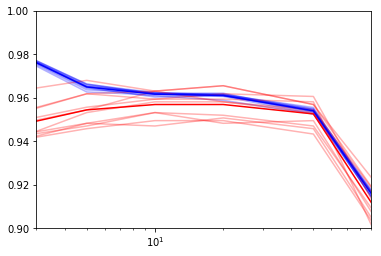

In [0]:
plt.semilogx(klist,train_scores1,c='b',alpha=0.3)
plt.semilogx(klist,test_scores1,c='r',alpha=0.3);

plt.semilogx(klist,np.mean(train_scores1,axis=1),c='b',alpha=1.0);
plt.semilogx(klist,np.mean(test_scores1,axis=1),c='r',alpha=1.0);
plt.xlim(3,90)
plt.ylim(0.90,1.0)

In [0]:
klist = range(3,50)
train_scores, test_scores = validation_curve(clf, Xtrain, ytrain.values.ravel(),'n_neighbors',klist,cv=20,n_jobs=5)

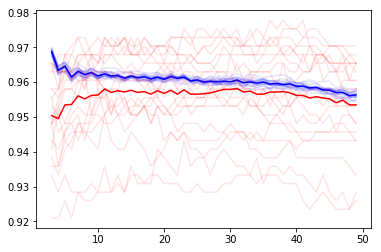

In [0]:
plt.plot(klist,np.mean(train_scores,axis=1),c='b',alpha=1.0)
plt.plot(klist,np.mean(test_scores,axis=1),c='r',alpha=1.0);
plt.plot(klist,train_scores,c='b',alpha=0.1)
plt.plot(klist,test_scores,c='r',alpha=0.1);

In [0]:
clf=KNeighborsClassifier(n_neighbors=30)
clf.fit(Xtrain,ytrain.values.ravel())

yhat_test = clf.predict(Xtest)

dfsol_semiclever = pd.Series(yhat_test,dtype='int',name='y')
dfsol_semiclever.index.name='Id'

dfsol_semiclever.to_csv('data/clever_submission.csv',header=True)

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,Xtrain,ytrain.values.ravel(),cv=35)
print('{0:1.2f}+/-{1:1.2f}'.format(np.mean(scores),np.std(scores,ddof=1)))

0.96+/-0.01


In [0]:
Xtest.shape

(8100, 2)